# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
Итак, нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# План работы

- Установить и загрузить нужные бибилотеки
- Загрузить данные
- Провести предобработку
- Провести исследовательский анализ данных
- Провести корреляционный анализ данных
- Написание пайплайнов для решения задачи
- Сегментирование пользователей
- Итоговый вывод

## Загрузка и импорт библиотек

In [1]:
pip install phik -q # -q убирает необязательные выводы в командах Linux

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install optuna

     |████████████████████████████████| 362 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install optuna-integration

     |████████████████████████████████| 96 kB 979 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shap

     |████████████████████████████████| 539 kB 1.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -U scikit-learn

     |████████████████████████████████| 13.4 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 90.9 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


Загружаем библиотеки

In [6]:
import optuna
from optuna import distributions
from optuna.integration import OptunaSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [7]:
#Библиотеки и предупреждения
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
import math
warnings.filterwarnings("ignore", category=FutureWarning)
import shap

#Классы, пайплайны и проечее
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from phik.report import plot_correlation_matrix
from phik import phik_matrix
from sklearn.impute import SimpleImputer
#Модели
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from optuna.integration import OptunaSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Загружаем датасеты:

In [8]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=";", decimal=",")

Осмотр:

In [9]:
for name, df in [('market_file', market_file), ('market_money', market_money), ('market_time', market_time), ('money', money)]:
    print()
    print(f"Выводим 3 строки дф {name}:")
    display(df.head(3))


Выводим 3 строки дф market_file:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5



Выводим 3 строки дф market_money:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0



Выводим 3 строки дф market_time:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10



Выводим 3 строки дф money:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13


Вывод по загрузке:
    Похоже все данные загрузились корректно, перейдем к предобработке.

## Предобработка данных

Осмотрим каждый дф на наличие пропусков, выбросов и странных значений. Напишем для этого функцию:

In [10]:
def get_info(df):
    print('Количество дубликатов:', df.duplicated().sum())
    display(df.head())
    print()
    display(df.info())
    print()
    display(df.describe())
    # Посмотрим на уникальные значения в столбцах со строковыми значениями:
    string_columns = df.select_dtypes(include=['object']).columns
    for col in string_columns:
        unique_values = df[col].unique()
        print(f"\nUnique values for column '{col}':")
        for val in unique_values:
            print(val)

### market_file

In [11]:
get_info(market_file)

Количество дубликатов: 0


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса               

None

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000



Unique values for column 'Покупательская активность':
Снизилась
Прежний уровень

Unique values for column 'Тип сервиса':
премиум
стандартт
стандарт

Unique values for column 'Разрешить сообщать':
да
нет

Unique values for column 'Популярная_категория':
Товары для детей
Домашний текстиль
Косметика и аксесуары
Техника для красоты и здоровья
Кухонная посуда
Мелкая бытовая техника и электроника


Единственная небольшая проблема - дублирующие значения в столбце 'Тип сервиса': "стандарт" и "стандартт" - очевидно, одинаковые значения, во втором опечатка, подправим это:

In [12]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')
print(market_file['Тип сервиса'].unique())

['премиум' 'стандарт']


Вывод по market_file:
    На данном этапе каких-либо серьезных проблем с данными не обнаружено. Распредение числовых данных судя по методу describe не показало странных значений и выбросов. Опечатка в столбце "Тип сервиса" мы подправили. Дубликатов нет. Перейдем в следующему дф.

###  market_money

In [13]:
get_info(market_money)

Количество дубликатов: 0


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000



Unique values for column 'Период':
препредыдущий_месяц
текущий_месяц
предыдущий_месяц


Немного странно выглядит максимальная выручка - 106000 при среднем значении около 5000. Построим boxplot, посмотрим на выбросы.

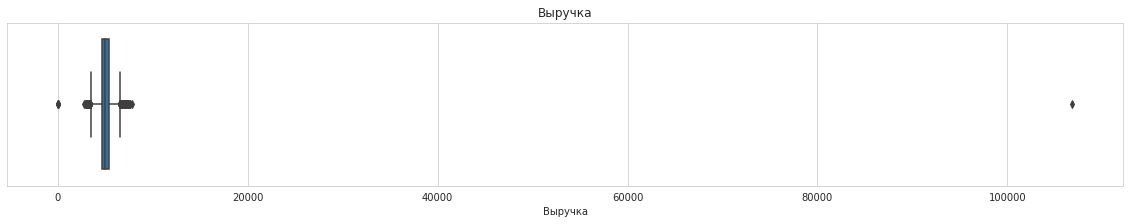

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 3))
sns.boxplot(x=market_money["Выручка"])
plt.title("Выручка")
plt.xlabel("Выручка")
plt.show()

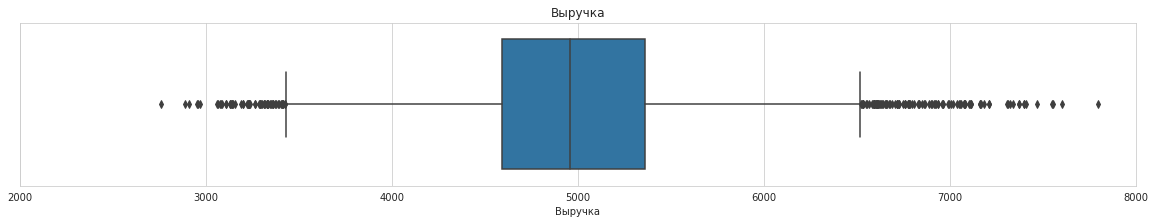

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 3))
sns.boxplot(x=market_money["Выручка"])
plt.title("Выручка")
plt.xlabel("Выручка")
plt.gca().set_xlim(2000, 8000)
plt.show()

Если выброс со значением выручки 0 выглядит более-менее реально (просто не совершали покупок), то вот одинокая выручка 106000 на фоне средней в 5000 явно странная. Удалим эту запись и записи с нулевой выручкой, думаю, они не пригодятся:

In [16]:
print('Строк до удаления выброса:', market_money.shape)
market_money = market_money[market_money["Выручка"] <= 106000]
market_money = market_money[market_money["Выручка"] != 0]
print('Строк после удаления выброса:', market_money.shape)

Строк до удаления выброса: (3900, 3)
Строк после удаления выброса: (3893, 3)


Вывод по market_money:
    В целом с данными всё хорошо, исключение выбросы, их мы удалили. Дубликатов нет. Идём дальше.

###  market_time

In [17]:
get_info(market_time)

Количество дубликатов: 0


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000



Unique values for column 'Период':
текущий_месяц
предыдцщий_месяц


В столбце период в значении "предыдущий_месяц" есть опечатка. Исправим это:

In [18]:
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий месяц')
market_time['Период'].unique()

array(['текущий_месяц', 'предыдущий месяц'], dtype=object)

Вывод по market_time:
    В целом с данными всё хорошо, опечатку мы поправили. Дубликатов нет. Перейдем к последнему дф.

### money

In [19]:
get_info(money)

Количество дубликатов: 0


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Вывод по money: C данными всё хорошо.

### Вывод по предобработке

Предобработка не выявила каких-либо серьезных проблем с данными. Были пара опечаток и выброс. Всё это мы поправили. С разрешения в задании столбцы было решено оставить на русском языке и не тратить время и силы на приведение к snake_case. Можно переходить к следующему этапу.

## Исследовательский анализ данных

Сделаем id в каждом дф индексом, чтобы они не мешались при построении графиков и гистограмм:

market_file = market_file.set_index('id')
market_money = market_money.set_index('id')
market_time = market_time.set_index('id')
money = money.set_index('id')

In [20]:
display(market_file)
display(market_money)
display(market_time)
display(money)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


,id,Период,Выручка
1,215348,текущий_месяц,3293.1
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдущий месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


Изучим как распределены все признаки во всех таблицах. Для этого напишем функции:

In [21]:
def plot_num_columns(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_columns = numeric_columns[numeric_columns != 'id']
    for col in numeric_columns:
        f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                             figsize=(15, 5), 
                                             sharex=True,
                                             gridspec_kw=dict(height_ratios=[4,1]))
        sns.histplot(data=df, x=col, kde=True, ax=axs_hist, color='lightgreen', edgecolor='green')\
            .set(title=f'Гистограмма распределения {col}',
                 ylabel='Количество записей')
        sns.boxplot(data=df, x=col, ax=axs_box, color='lightgreen')\
            .set(xlabel=f'{col}');

In [22]:
def plot_cat_columns(df):
    categorical_cols = df.select_dtypes(include=['object']).columns

    num_plots = len(categorical_cols)
    fig, axes = plt.subplots(num_plots, 1, figsize=(15, 5 * num_plots))

    if num_plots == 1:
        sns.countplot(x=categorical_cols[0], data=df, ax=axes, palette="Set1")
        axes.set_title(f'График {categorical_cols[0]}')
        axes.set_xlabel(categorical_cols[0])
    else:
        for i, col in enumerate(categorical_cols):
            sns.countplot(x=col, data=df, ax=axes[i], palette="Set1")
            axes[i].set_title(f'График {col}')
            axes[i].set_xlabel(col)

    plt.tight_layout()
    plt.show()

### market_file

#### market_file Количественные признаки

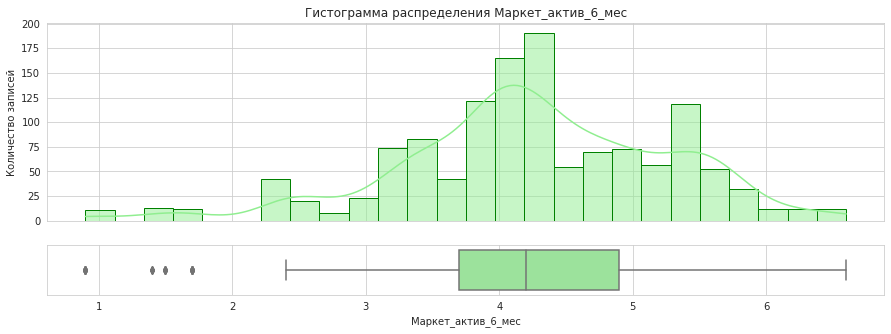

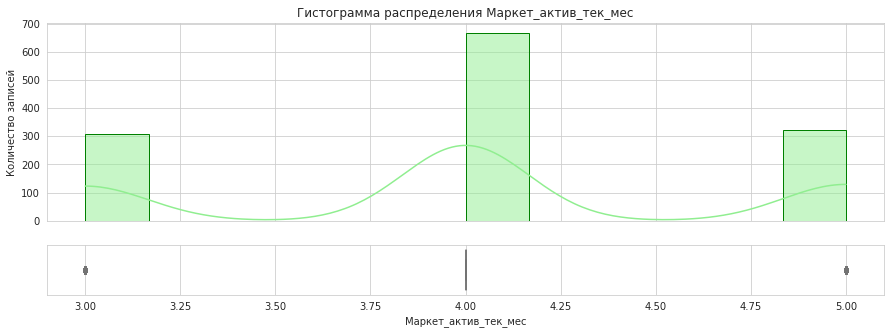

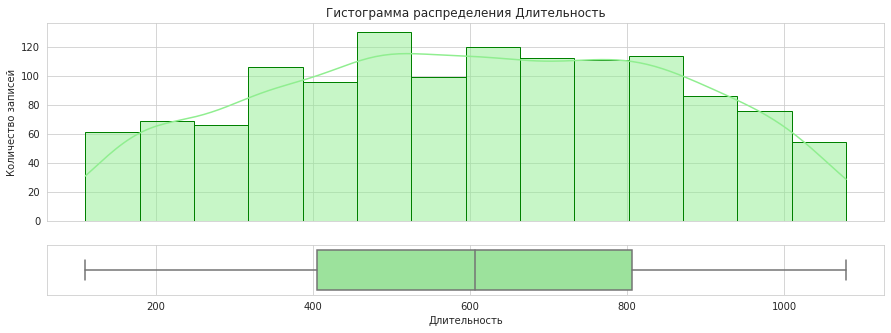

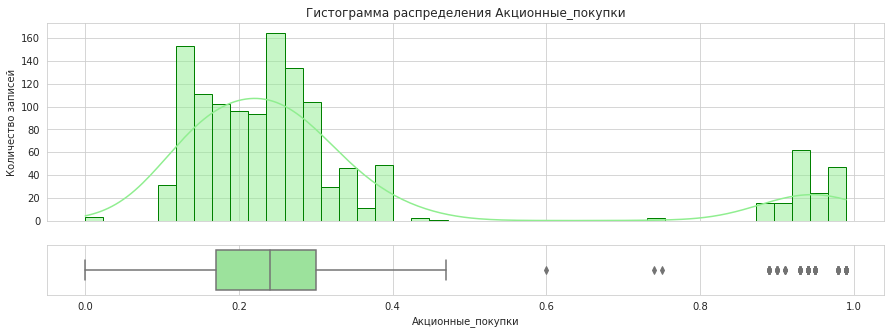

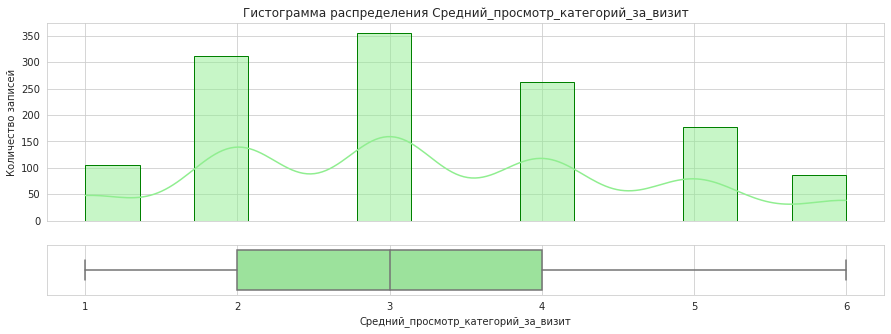

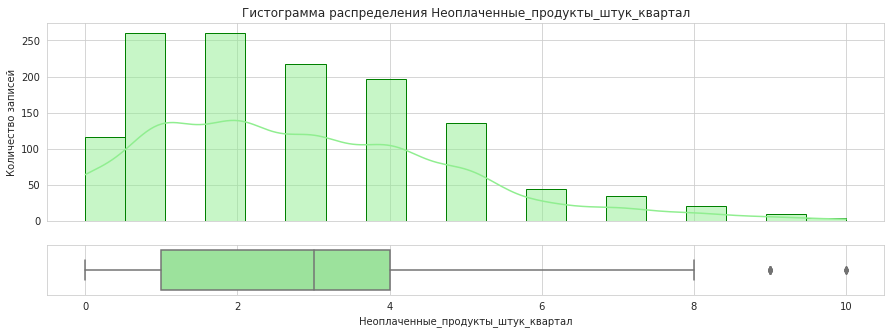

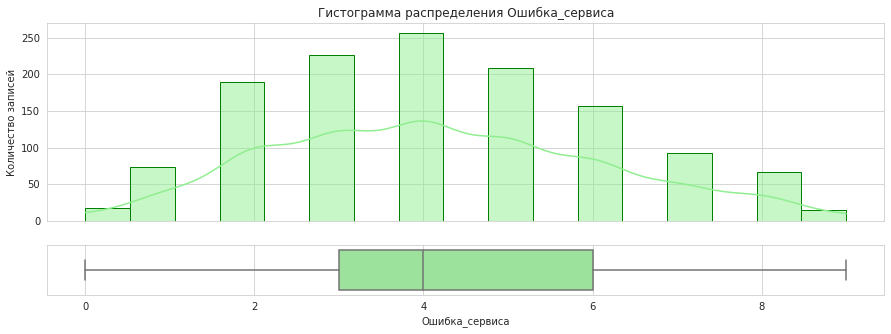

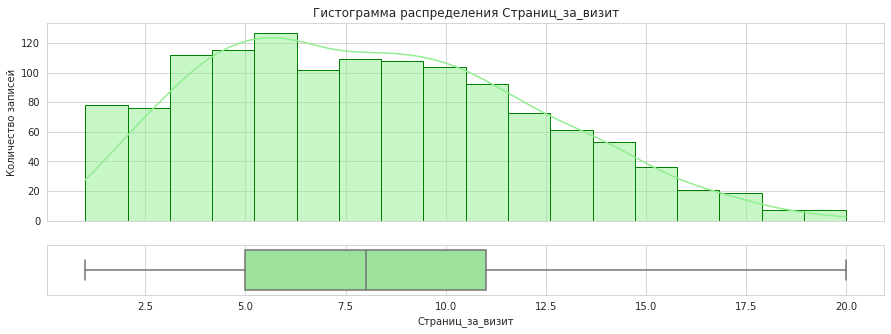

In [23]:
plot_num_columns(market_file)

Вывод по количественным признакам market_file:
    Данные по большей части имеют не нормальное распределение. В столбцах Маркет_актив_6_мес, Акционные_покупки, Неоплаченные_продукты_штук_квартал присутствуют выбросы. Хотя боксплот показывает в Маркет_актив_тек_мес значения параметра 3 и 5 как выбросы, они таковыми не являются. Просто в среднем, маркетинговый отдел делает от 3 до 5 акций в месяц для покупателя.
    

#### market_file Категориальные признаки

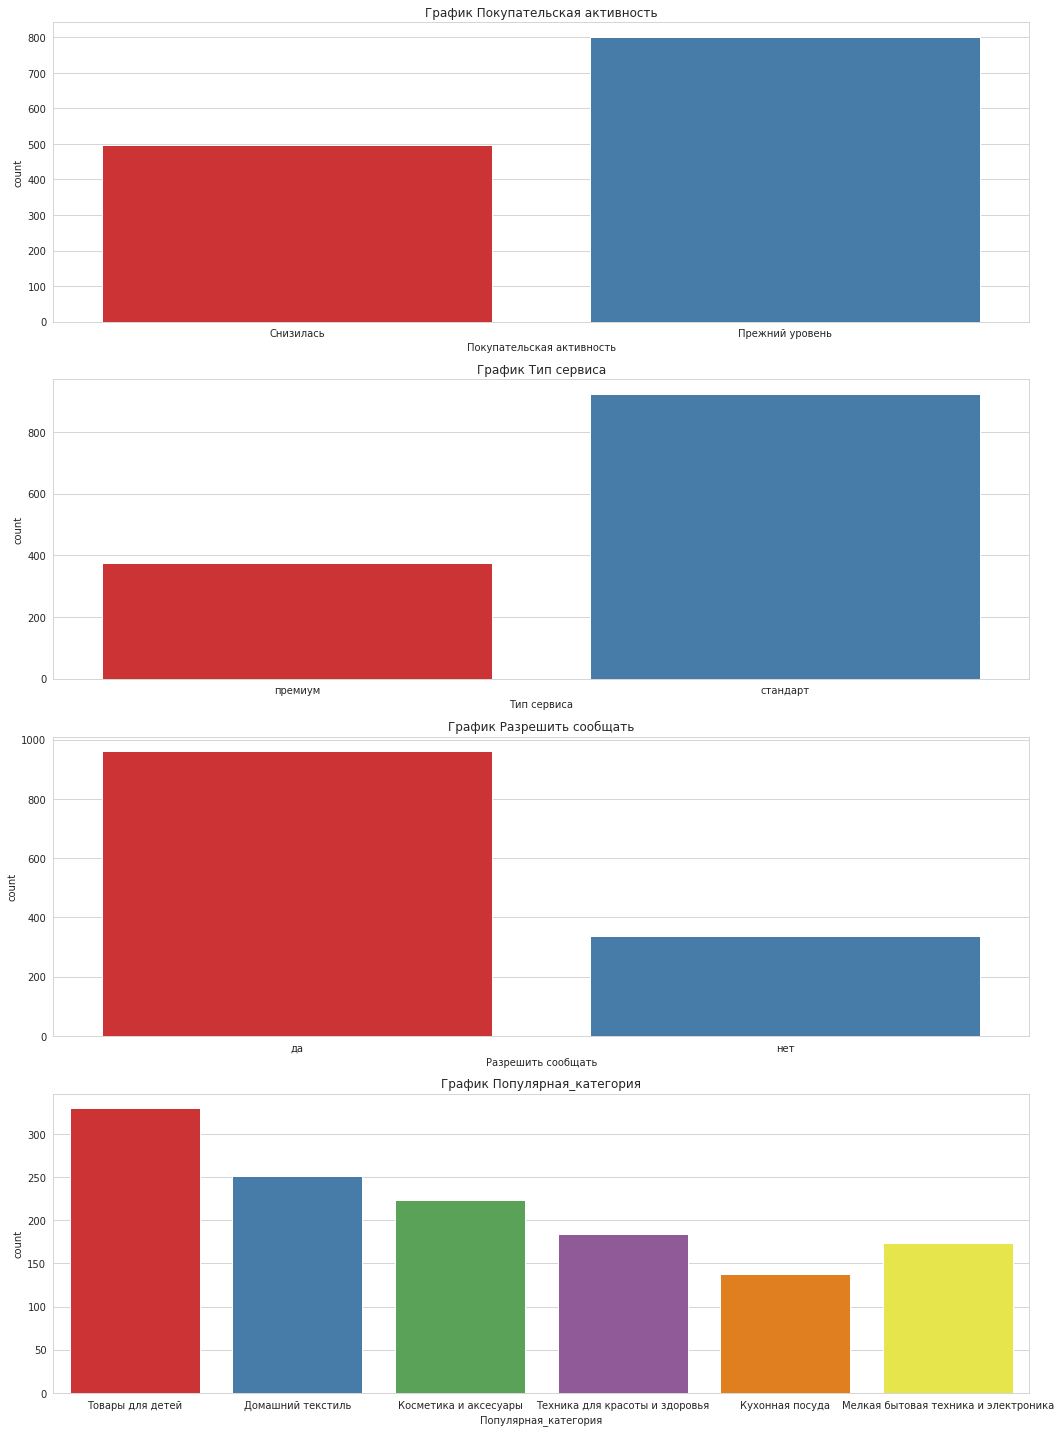

In [24]:
plot_cat_columns(market_file)

Вывод по категориальным признакам market_file:
    Видно, что клиентская активность и предпочтения имеют дисбаланс классов. Видно, что чаще покупательская активность остается на прежнем уровне, но доля клиентов снизивших количество покупок немаленькое. Чаще клиенты предпочитают сервис "Стандарт", большинство клиентов любят быть в курсе о всех изменениях товара - параметр "Разрешить сообщать" имеет больше значений "да" чем "нет". Самая популярная категория - "Товары для детей", самая непопулярная - "Кухонная посуда".

### market_money

In [25]:
market_money.shape

(3893, 3)

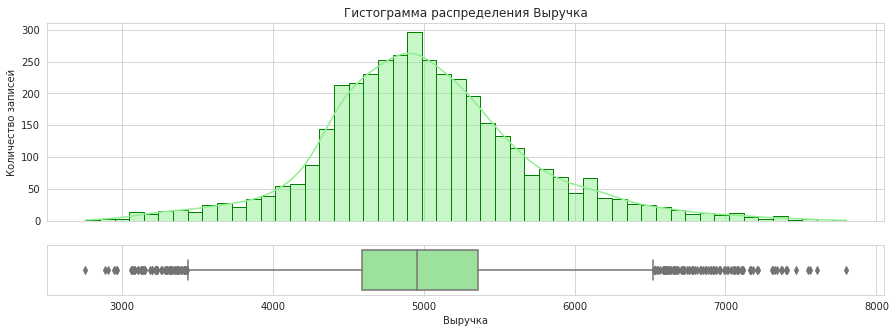

In [26]:
plot_num_columns(market_money)

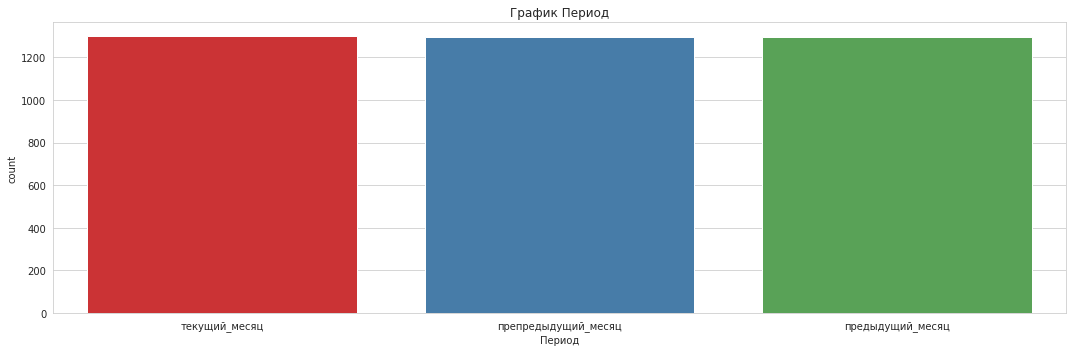

In [27]:
plot_cat_columns(market_money)

Вывод по market_money:
    похоже данные по выручке распределены нормально, в среднем выручка составляет около 5000, много выбросов, но они не выглядят из "ряда вон". Данные по периоду распределены равномерно, практически одинакого.

### market_time

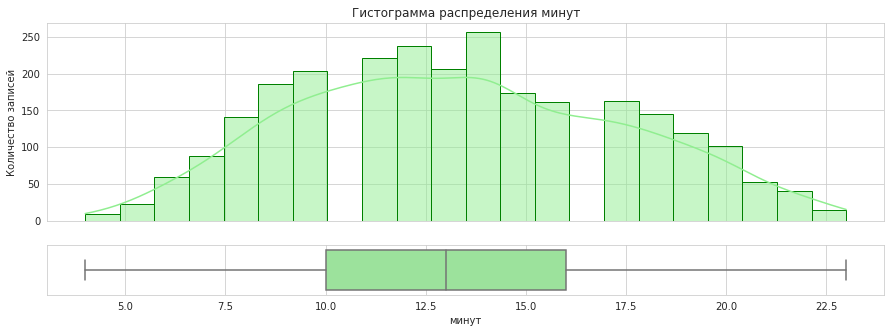

In [28]:
plot_num_columns(market_time)

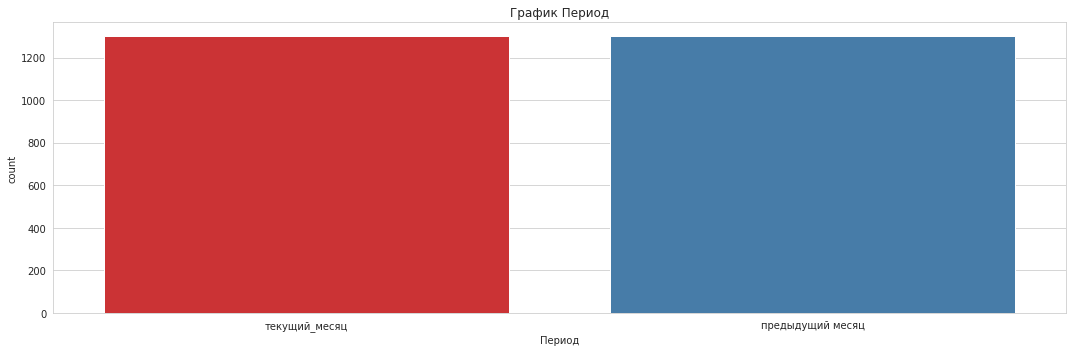

In [29]:
plot_cat_columns(market_time)

Вывод по market_time:
    Данные по минутам распределены нормально, но есть отстутвующие значения. Данные по периодам распределны равномерно.

### money

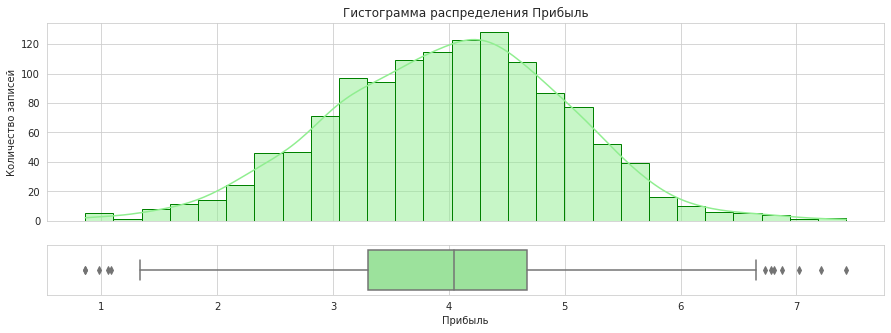

In [30]:
plot_num_columns(money)

Вывод по money:
    Данные по прибыли распределены нормально, но есть выбросы.

### Вывод по ИАД

В некоторых таблицах имеются выбросы и неравномерное распределение признаков. Это нужно будет учитывать при выборе и построении моделей. 
В целом, клиенты по большей части сохраняют покупательскую активность на прежнем уровне, предпочитают тип сервиса "стандарт", соглашаются на сообщения и дополнительных акциях на товары, самая популярная категория - "товары для детей" характеризует целевую аудиторию как людей с детьми.
Можно переходить дальше.

## Объединение таблиц

Создадим на всякий случай резервные копии, они пригодятся.

In [31]:
market_money_for_merge = market_money.copy()
market_time_for_merge = market_time.copy()
market_money_for_merge = market_money.copy()

In [32]:
market_money_for_merge.head()

,id,Период,Выручка
1,215348,текущий_месяц,3293.1
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0


In [33]:
# Создание сводной таблицы
market_money_for_merge_table = market_money_for_merge.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum')

# Вывод сводной таблицы
market_money_for_merge_table

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
...,...,...,...
216643,3664.0,4704.0,4741.7
216644,4729.0,5299.0,5353.0
216645,5160.0,5334.0,5139.2


In [34]:
# Отбор строк, где ни в одном из столбцов нет нулей
filtered_market_money = market_money_for_merge_table[(market_money_for_merge_table >= 0).all(axis=1)]
filtered_market_money

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5
...,...,...,...
216643,3664.0,4704.0,4741.7
216644,4729.0,5299.0,5353.0
216645,5160.0,5334.0,5139.2


In [35]:
# Создание сводной таблицы
market_time_for_merge_table = market_time_for_merge.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum')

# Вывод сводной таблицы
market_time_for_merge_table

Период,предыдущий месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [36]:
# Отбор строк, где ни в одном из столбцов нет нулей
filtered_market_time = market_time_for_merge_table[(market_time_for_merge_table >= 0).all(axis=1)]
filtered_market_time

Период,предыдущий месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [37]:
# Объединение датафрейма market_file и market_money_for_merge
df = pd.merge(market_file, filtered_market_money, on='id')

# Объединение датафрейма merged_df и market_time_for_merge
df = pd.merge(df, market_time_for_merge_table, on='id')

In [38]:
df.rename(columns={'предыдущий_месяц': 'выручка_пред_мес'}, inplace=True)
df.rename(columns={'препредыдущий_месяц': 'выручка_препред_мес'}, inplace=True)
df.rename(columns={'текущий_месяц_x': 'выручка_тек_мес'}, inplace=True)
df.rename(columns={'предыдущий месяц': 'минуты_пред_мес'}, inplace=True)
df.rename(columns={'текущий_месяц_y': 'минуты_тек_мес'}, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

In [40]:
df.duplicated().sum()

0

Посомтрим на  наличие дубликатов:

In [41]:
print(df.duplicated().sum())

0


Вывод по объединению таблиц. На выходе получился дф размером 1296 строк, и 18 столбцов. 
P.S. Есть некоторые сомненияв правильности объединения. 

## Корреляционный анализ

In [42]:
def scatterplot_with_hue(df, hue):
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    numerical_features = numerical_features.drop('id')
    num_plots = len(numerical_features)
    num_cols = 2
    num_rows = math.ceil(num_plots / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 5*num_rows))

    # Создайте список цветов для каждого значения hue
    colors = ['green', 'purple']

    for i, feature in enumerate(numerical_features):
        row = i // num_cols
        col = i % num_cols

        sns.scatterplot(x=df.index, y=feature, hue=hue, palette=colors, data=df, ax=axes[row, col])
        axes[row, col].set_title(f"Scatterplot {feature}")
        axes[row, col].grid(True)

    plt.tight_layout()
    plt.show()

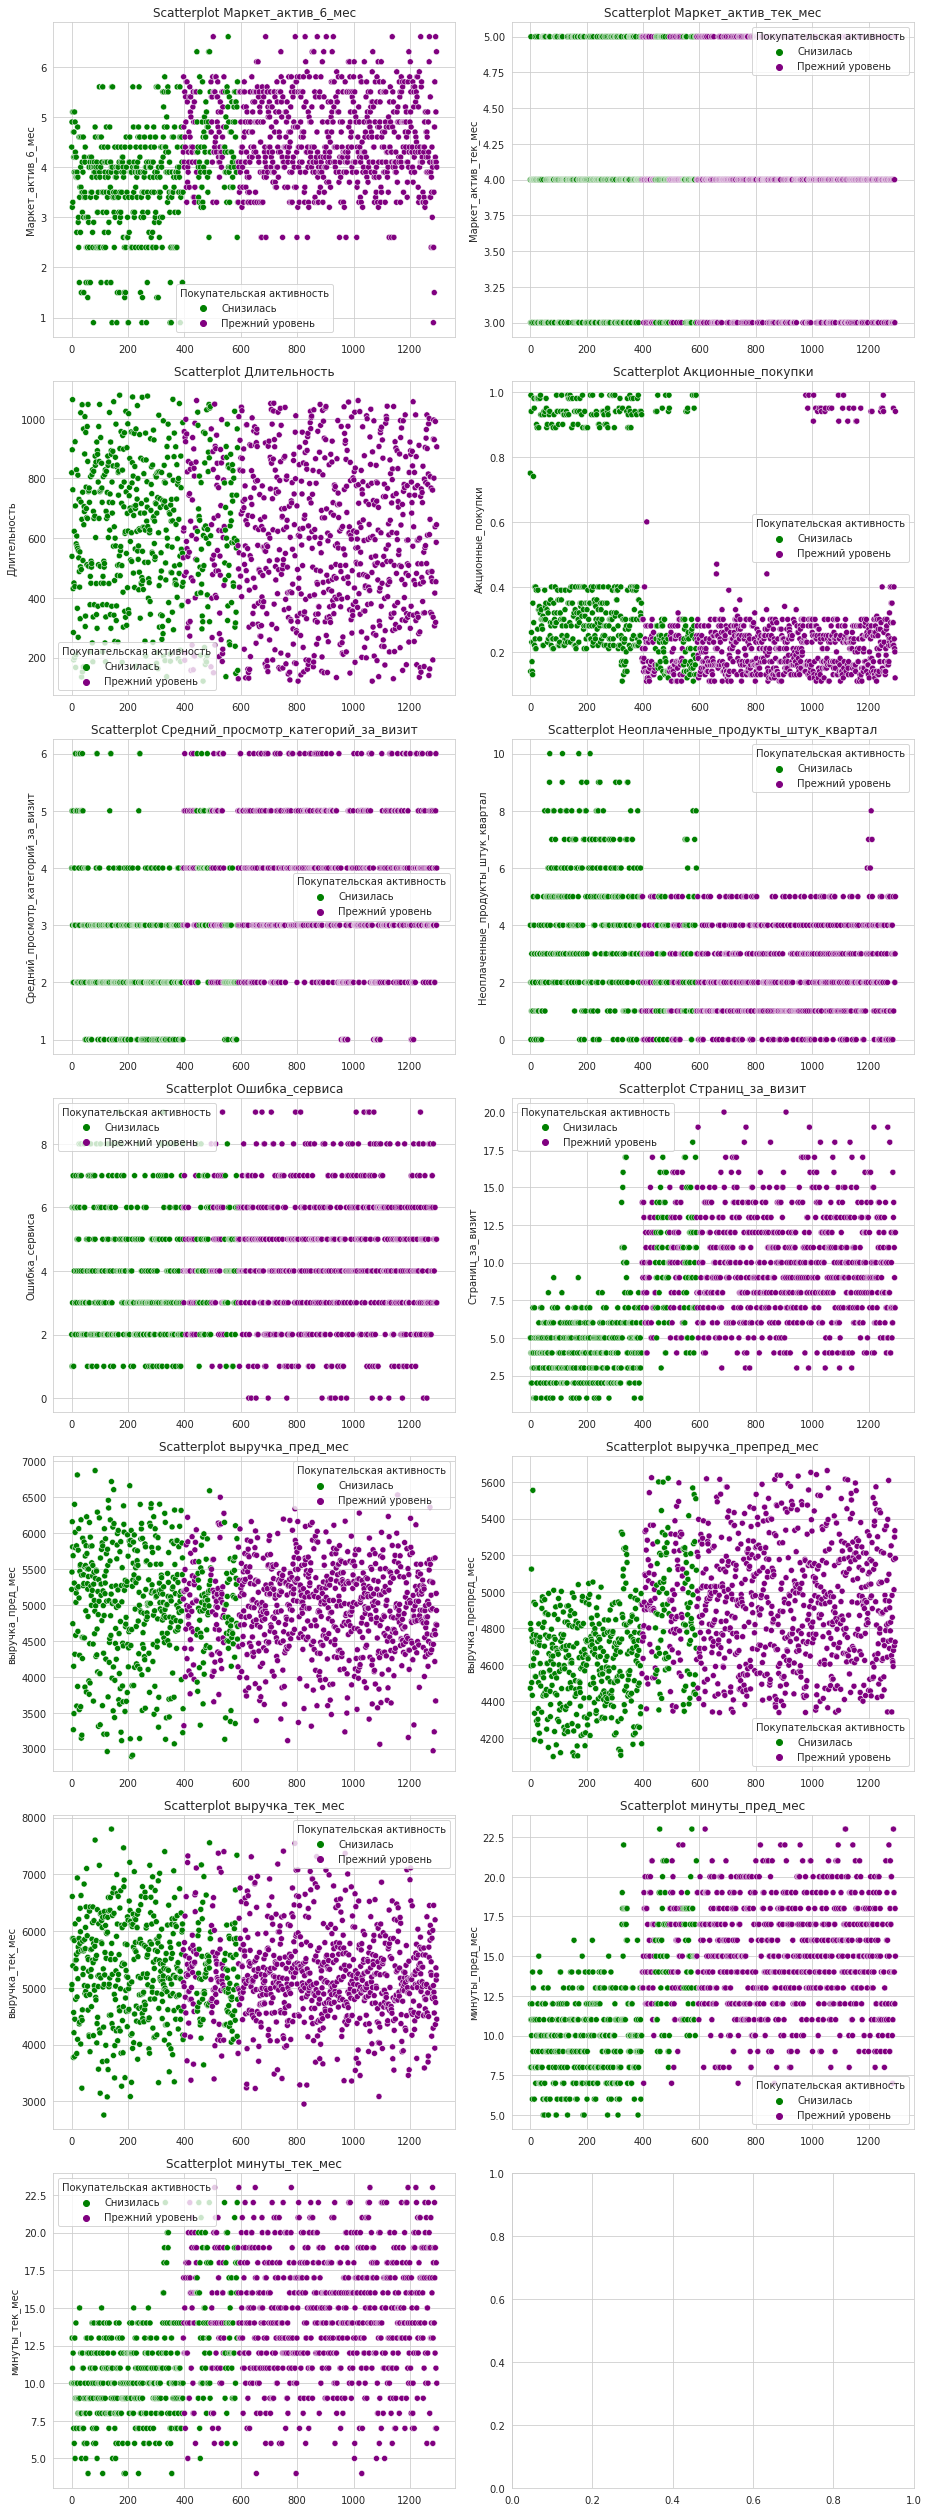

In [43]:
scatterplot_with_hue(df, 'Покупательская активность')

In [44]:
warnings.filterwarnings("ignore") # Хоть на графиках всё видно, 
#решил ниже написать "экспериментальную функцию". Она выдает предупреждение, поэтому добавил это код

In [45]:
from scipy.stats import shapiro

def check_normality(df, alpha=0.05):

    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    normality_results = pd.DataFrame(index=numerical_features)

    for feature in numerical_features:
        data = df[feature]
        stat, p_value = shapiro(data)
        normality_results.loc[feature, 'Stat'] = stat
        normality_results.loc[feature, 'P-value'] = p_value
        normality_results.loc[feature, 'Normality'] = 'Нормальное распределение' if p_value > alpha else 'Не нормальное распределение'

    return normality_results
result = check_normality(df)
print(result)

                                         Stat       P-value  \
id                                   0.954994  1.573316e-19   
Маркет_актив_6_мес                   0.978031  3.778058e-13   
Маркет_актив_тек_мес                 0.805889  8.104835e-37   
Длительность                         0.972601  5.744778e-15   
Акционные_покупки                    0.657736  4.203895e-45   
Средний_просмотр_категорий_за_визит  0.930570  4.676106e-24   
Неоплаченные_продукты_штук_квартал   0.933030  1.163928e-23   
Ошибка_сервиса                       0.965845  6.524341e-17   
Страниц_за_визит                     0.973954  1.540825e-14   
выручка_пред_мес                     0.990200  1.309214e-07   
выручка_препред_мес                  0.986371  1.155594e-09   
выручка_тек_мес                      0.994703  1.533084e-04   
минуты_пред_мес                      0.982748  2.616151e-11   
минуты_тек_мес                       0.979669  1.528779e-12   

                                                      

Поскольку распределение ненормальное будем для построения матрицы корреляций использовать критерий Спирмана.

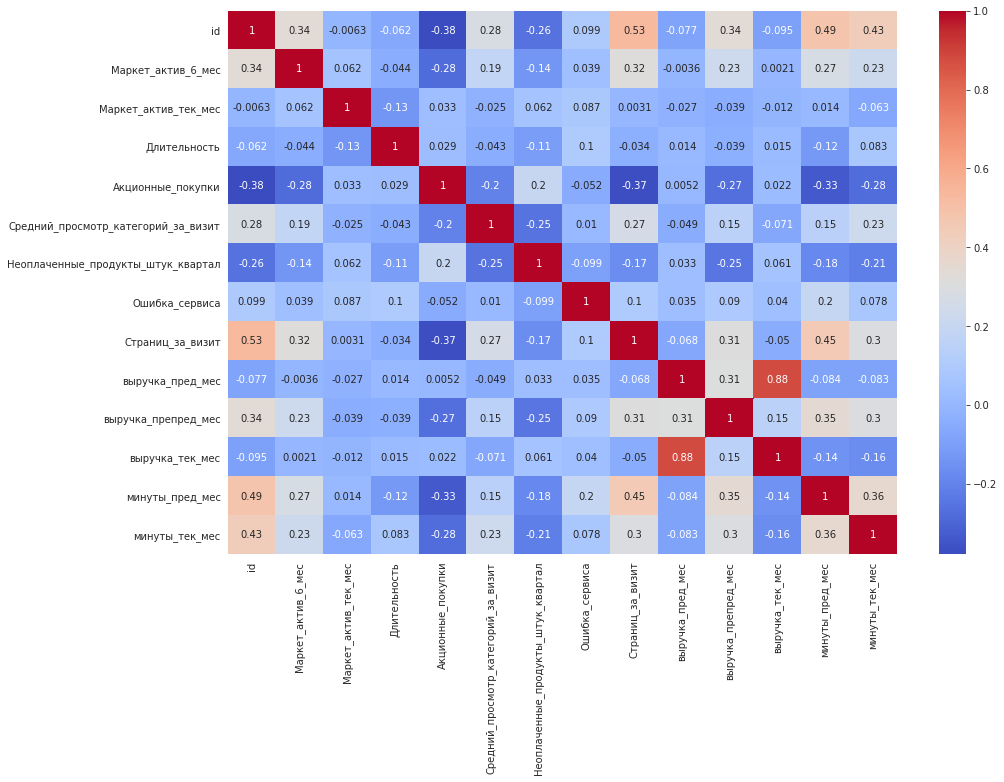

In [46]:
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr(method='spearman')

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Судя по матрице корреляций есть значение близкое к мультиколлинеарныму - 0.88 (выручка_тек_мес и предыдущий_месяц). В остальном каких-либо странных значений не обнаружено, хитмэп в основном "холодный". Местами есть средняя по силе корреляция (Страниц_за_визит и минуты_пред_мес).
Scatterplotы признаков по месячно выявили снижение связи выручки и маркетинговой активности за последние 6 месяцев, что указывает на то, что три месяца назад была положительная взамосвясь активности и выручкой, а в последующий месяц она пропала и эта тендеция распространилась и на текущий месяц.

## Использование пайплайнов

Из-за быстродействия воспользуемся RandomizedSearchCV. Для кодирования бинарных признаков воспользуемся OHE, для мультиклассовых - Ordinal. Для масштабирования - StandardScaler, MinMaxScaler и RobustScaler.

Тут сразу оговорюсь...Изначально я пытался сделать через Optuna. И у меня даже вышел рабочий код (я его скинул сюда и замаркдаунил). Но дальше пошли супер трудности... Оптюна выдала мне, что лучшая модель это SVC с точностью немного превышающей, ту что выдал randomizesearch. Вроде бы ничего плохого нет. Но когда дошло до построения графиков важности тут я засел на 4 дня...Я обил все пороги, Преподаватель, куратор, нейронки, документация, знакомые айтишники. Ни в какую не хотел строится (KernelExplainer и predict_proba пробовал тоже - ни в какую). Спустя 4 дня, я построил, криво-косо. Но там пошла следующая проблема. Графики важности оказались без подписей признаков и назывались просто Feature 1, Feature 2 ...и т.д (видимо после препроцесса, перешли в numpy). Не смог я с этим справится, откровенно говоря. В общем после матов, криков и сильнейшего выгорания я переделал пайплайн, получил более скромные результаты и модель LogisticRegression, с ней практически никаких проблем не было. 

### Создание пайплайна

<font color='blue'><b>Комментарий Студента: </b></font>
    Полностью передал эту (6) часть. Всё равно пришел к SVC от которой бессознательно пытался сбежать. Повторюсь были проблемы с построением SHAP. Сейчас кое-как решил. Но до этого потратил несколько дней. То графики не строились, то фичи не подписывались. Много нервов ушло.

In [47]:
df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_пред_мес,выручка_препред_мес,выручка_тек_мес,минуты_пред_мес,минуты_тек_мес
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [48]:
df1 = df.copy() #сделаем копию, нужна будет далее
df = df.drop('id', axis=1)
df.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_пред_мес,выручка_препред_мес,выручка_тек_мес,минуты_пред_мес,минуты_тек_мес
0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


Для оценки качества моделей будем использовать метрику roc_auc  - площадь под кривой. Данная метрика оценивает качество моделей в наиболее общем виде, учитывая все пороговые значения. Также она подходит потому, что у нас есть небольшой дисбаланс классов в целевом признаке (исходя из данных полученных в ИАД). Начнем написание пайплайна:

In [49]:
RANDOM_STATE = 42 #Зададим константы
TEST_SIZE = 0.25

In [50]:
X = df.drop(['Покупательская активность'], axis=1)
y = df['Покупательская активность']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

Проверим разбиение:

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Тип сервиса                          1296 non-null   object 
 1   Разрешить сообщать                   1296 non-null   object 
 2   Маркет_актив_6_мес                   1296 non-null   float64
 3   Маркет_актив_тек_мес                 1296 non-null   int64  
 4   Длительность                         1296 non-null   int64  
 5   Акционные_покупки                    1296 non-null   float64
 6   Популярная_категория                 1296 non-null   object 
 7   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 8   Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 9   Ошибка_сервиса                       1296 non-null   int64  
 10  Страниц_за_визит                     1296 non-null   int64  
 11  выручка_пред_мес              

In [53]:
print(y)

0             Снизилась
1             Снизилась
2             Снизилась
3             Снизилась
4             Снизилась
             ...       
1291    Прежний уровень
1292    Прежний уровень
1293    Прежний уровень
1294    Прежний уровень
1295    Прежний уровень
Name: Покупательская активность, Length: 1296, dtype: object


In [54]:
#Разобьем признаки для дальнейшего кодирования
ohe_columns = ['Разрешить сообщать', 'Популярная_категория']
ord_columns = ['Тип сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
               'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
               'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
               'Страниц_за_визит','выручка_пред_мес','выручка_тек_мес', 'выручка_препред_мес', 'минуты_пред_мес','минуты_тек_мес',]

In [55]:
# создаём общий пайплайн для подготовки данных

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )

ord_pipe = Pipeline(
    [
        ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan))
    ]
)


data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', MinMaxScaler(), num_columns)
], remainder='passthrough')

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1.0, 10.0, 100.0],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__kernel': ['linear',  'rbf', 'poly', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]


#### Поиск через RandomizedSearshCV()

In [56]:
# Воспользуемся наиболее точным поиском лучшей модели - GridSearch
random_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
random_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', random_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', random_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = random_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                            

Вывод:  

SVC probability=True, random_state=42

Метрика лучшей модели на тренировочной выборке: 0.9112371975281066

Метрика ROC-AUC на тестовой выборке: 0.9138858552764632

#### Поиск через OptunaSearchCV()

Похоже Optuna не поддерживает поиск сразу по нескольким моделям, придется пройти в вручную:

##### DECISION TREE

In [57]:
# создаём общий пайплайн для подготовки данных

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )

ord_pipe = Pipeline(
    [
        ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan))
    ]
)


data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', MinMaxScaler(), num_columns)
], remainder='passthrough')

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(probability=True, random_state=RANDOM_STATE))
])


In [58]:
param_grid = {
        'models': distributions.CategoricalDistribution([DecisionTreeClassifier(random_state=RANDOM_STATE)]),
        'models__max_depth': distributions.IntDistribution(2, 5),
        'models__max_features': distributions.IntDistribution(2, 5),
        'preprocessor__num': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), RobustScaler()])
}

In [59]:
optuna_search = OptunaSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    scoring='roc_auc',
    n_trials=30
)


optuna_search.fit(X_train, y_train)

[I 2024-10-01 06:50:35,682] A new study created in memory with name: no-name-1badca01-0e73-4eb9-8ee7-ef48b635433e
[I 2024-10-01 06:50:37,038] Trial 3 finished with value: 0.8469806132578862 and parameters: {'models': DecisionTreeClassifier(max_depth=5, max_features=5, random_state=42), 'models__max_depth': 4, 'models__max_features': 5, 'preprocessor__num': MinMaxScaler()}. Best is trial 3 with value: 0.8469806132578862.
[I 2024-10-01 06:50:37,099] Trial 5 finished with value: 0.8693951765815402 and parameters: {'models': DecisionTreeClassifier(max_depth=5, max_features=5, random_state=42), 'models__max_depth': 3, 'models__max_features': 2, 'preprocessor__num': MinMaxScaler()}. Best is trial 5 with value: 0.8693951765815402.
[I 2024-10-01 06:50:37,103] Trial 2 finished with value: 0.8484583910356639 and parameters: {'models': DecisionTreeClassifier(max_depth=5, max_features=5, random_state=42), 'models__max_depth': 5, 'models__max_features': 5, 'preprocessor__num': StandardScaler()}. Be

OptunaSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('ohe',
                                                                                            OneHotEncoder(drop='first'))]),
                                                                           ['Разрешить '
                                                                            'сообщать',
                                                                            'Популярная_категория']),
                                                                          ('ord',
                                                                           Pipeline(steps=[('ord',
                                                                                            OrdinalEncoder(categories=[['ст...
               param_distributions={'models': CategoricalDistribution(choices=(DecisionTreeClassifier(max_depth=3, max_features=2, random_state=42),)),
                                    'models__max_depth': IntDistribution(high=5, log=False, low=2, step=1),
                                    'models__max_features': IntDistribution(high=5, log=False, low=2, step=1),
                                    'preprocessor__num': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), RobustScaler()))},
               random_state=42, scoring='roc_auc')

In [60]:
y_test_pred = optuna_search.predict(X_test)  # Use predict instead of predict_proba

# Оценка модели
print('Лучшая модель и её параметры:\n\n', optuna_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', optuna_search.best_score_)
best_model = optuna_search.best_estimator_

# Получение предсказанных вероятностей на тестовой выборке
y_test_pred_proba = best_model.predict_proba(X_test)

# Оценка метрики ROC-AUC на основе предсказанных вероятностей
roc_auc = roc_auc_score(y_test, y_test_pred_proba[:, 1])
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                            

##### KNN

In [61]:
param_grid = {
        'models': distributions.CategoricalDistribution([KNeighborsClassifier()]),
        'models__n_neighbors': distributions.IntDistribution(2,5),
        'preprocessor__num': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), RobustScaler()])
    }

In [62]:
optuna_search = OptunaSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    scoring='roc_auc',
    n_trials=30
)


optuna_search.fit(X_train, y_train)

[I 2024-10-01 06:50:42,491] A new study created in memory with name: no-name-5d5a4c9e-d053-4898-a10b-7a0d27c26c83
[I 2024-10-01 06:50:44,083] Trial 2 finished with value: 0.8816375338148065 and parameters: {'models': KNeighborsClassifier(n_neighbors=4), 'models__n_neighbors': 4, 'preprocessor__num': StandardScaler()}. Best is trial 2 with value: 0.8816375338148065.
[I 2024-10-01 06:50:44,109] Trial 7 finished with value: 0.8566903643312734 and parameters: {'models': KNeighborsClassifier(n_neighbors=4), 'models__n_neighbors': 4, 'preprocessor__num': MinMaxScaler()}. Best is trial 2 with value: 0.8816375338148065.
[I 2024-10-01 06:50:44,124] Trial 3 finished with value: 0.856377654927655 and parameters: {'models': KNeighborsClassifier(n_neighbors=3), 'models__n_neighbors': 4, 'preprocessor__num': MinMaxScaler()}. Best is trial 2 with value: 0.8816375338148065.
[I 2024-10-01 06:50:44,295] Trial 5 finished with value: 0.8846417777281413 and parameters: {'models': KNeighborsClassifier(n_nei

OptunaSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('ohe',
                                                                                            OneHotEncoder(drop='first'))]),
                                                                           ['Разрешить '
                                                                            'сообщать',
                                                                            'Популярная_категория']),
                                                                          ('ord',
                                                                           Pipeline(steps=[('ord',
                                                                                            OrdinalEncoder(categories=[['ст...
                                              random_state=42))]),
               n_jobs=-1, n_trials=30,
               param_distributions={'models': CategoricalDistribution(choices=(KNeighborsClassifier(n_neighbors=3),)),
                                    'models__n_neighbors': IntDistribution(high=5, log=False, low=2, step=1),
                                    'preprocessor__num': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), RobustScaler()))},
               random_state=42, scoring='roc_auc')

In [63]:
y_test_pred = optuna_search.predict(X_test)  # Use predict instead of predict_proba

# Оценка модели
print('Лучшая модель и её параметры:\n\n', optuna_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', optuna_search.best_score_)
best_model = optuna_search.best_estimator_

# Получение предсказанных вероятностей на тестовой выборке
y_test_pred_proba = best_model.predict_proba(X_test)

# Оценка метрики ROC-AUC на основе предсказанных вероятностей
roc_auc = roc_auc_score(y_test, y_test_pred_proba[:, 1])
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                            

##### LogisticRegression

In [64]:
param_grid = {
        'models': distributions.CategoricalDistribution([LogisticRegression(random_state=RANDOM_STATE)]),
        'models__C': distributions.FloatDistribution(0.1, 1.0, 10.0),
        'preprocessor__num': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), RobustScaler()])
    }

In [65]:
optuna_search = OptunaSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    scoring='roc_auc',
    n_trials=30
)


optuna_search.fit(X_train, y_train)

[I 2024-10-01 06:50:49,938] A new study created in memory with name: no-name-9900621e-5894-4e13-a9f7-f2cffe9566f2
[I 2024-10-01 06:50:51,638] Trial 0 finished with value: 0.8958147891693347 and parameters: {'models': LogisticRegression(C=0.43629144279675786, random_state=42), 'models__C': 0.5668509944673767, 'preprocessor__num': StandardScaler()}. Best is trial 0 with value: 0.8958147891693347.
[I 2024-10-01 06:50:51,735] Trial 2 finished with value: 0.8985637976819796 and parameters: {'models': LogisticRegression(C=0.11691641354557035, random_state=42), 'models__C': 0.9432453449836078, 'preprocessor__num': MinMaxScaler()}. Best is trial 2 with value: 0.8985637976819796.
[I 2024-10-01 06:50:51,879] Trial 3 finished with value: 0.8985637976819796 and parameters: {'models': LogisticRegression(C=0.26128142677157906, random_state=42), 'models__C': 0.4866212866288354, 'preprocessor__num': MinMaxScaler()}. Best is trial 2 with value: 0.8985637976819796.
[I 2024-10-01 06:50:51,889] Trial 1 fi

OptunaSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('ohe',
                                                                                            OneHotEncoder(drop='first'))]),
                                                                           ['Разрешить '
                                                                            'сообщать',
                                                                            'Популярная_категория']),
                                                                          ('ord',
                                                                           Pipeline(steps=[('ord',
                                                                                            OrdinalEncoder(categories=[['ст...
                                              random_state=42))]),
               n_jobs=-1, n_trials=30,
               param_distributions={'models': CategoricalDistribution(choices=(LogisticRegression(C=0.98452911604217, random_state=42),)),
                                    'models__C': FloatDistribution(high=1.0, log=10.0, low=0.1, step=None),
                                    'preprocessor__num': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), RobustScaler()))},
               random_state=42, scoring='roc_auc')

In [66]:
y_test_pred = optuna_search.predict(X_test)  # Use predict instead of predict_proba

# Оценка модели
print('Лучшая модель и её параметры:\n\n', optuna_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', optuna_search.best_score_)
best_model = optuna_search.best_estimator_

# Получение предсказанных вероятностей на тестовой выборке
y_test_pred_proba = best_model.predict_proba(X_test)

# Оценка метрики ROC-AUC на основе предсказанных вероятностей
roc_auc = roc_auc_score(y_test, y_test_pred_proba[:, 1])
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                            

In [67]:
param_list = []

##### SVC

In [68]:
param_grid = {
    'models': distributions.CategoricalDistribution([SVC(probability=True, random_state=RANDOM_STATE)]),
    'preprocessor__num': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), RobustScaler()]),
    'models__kernel': distributions.CategoricalDistribution(['linear', 'poly', 'rbf', 'sigmoid']),
    'models__degree': distributions.IntDistribution(2, 5),
    'models__gamma': distributions.FloatDistribution(0.01, 10, 0.5)
}

In [69]:
optuna_search = OptunaSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    scoring='roc_auc',
    n_trials=30
)


optuna_search.fit(X_train, y_train)


[I 2024-10-01 06:50:58,326] A new study created in memory with name: no-name-6bab80d5-94a9-457c-afd3-f94f0d7904a1
[I 2024-10-01 06:51:04,573] Trial 7 finished with value: 0.8916733948824858 and parameters: {'models': SVC(degree=5, gamma=0.050483185010912604, kernel='sigmoid', probability=True,
    random_state=42), 'preprocessor__num': StandardScaler(), 'models__kernel': 'sigmoid', 'models__degree': 5, 'models__gamma': 0.050483185010912604}. Best is trial 7 with value: 0.8916733948824858.
[I 2024-10-01 06:51:05,081] Trial 2 finished with value: 0.8962029434393071 and parameters: {'models': SVC(gamma=7.4622801803467125, kernel='sigmoid', probability=True,
    random_state=42), 'preprocessor__num': MinMaxScaler(), 'models__kernel': 'poly', 'models__degree': 5, 'models__gamma': 0.017791757917594204}. Best is trial 2 with value: 0.8962029434393071.
[I 2024-10-01 06:51:05,114] Trial 1 finished with value: 0.895153133298588 and parameters: {'models': SVC(gamma=7.4622801803467125, kernel='sig

OptunaSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('ohe',
                                                                                            OneHotEncoder(drop='first'))]),
                                                                           ['Разрешить '
                                                                            'сообщать',
                                                                            'Популярная_категория']),
                                                                          ('ord',
                                                                           Pipeline(steps=[('ord',
                                                                                            OrdinalEncoder(categories=[['ст...
                                    'models__degree': IntDistribution(high=5, log=False, low=2, step=1),
                                    'models__gamma': FloatDistribution(high=10.0, log=0.5, low=0.01, step=None),
                                    'models__kernel': CategoricalDistribution(choices=('linear', 'poly', 'rbf', 'sigmoid')),
                                    'preprocessor__num': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), RobustScaler()))},
               random_state=42, scoring='roc_auc')

In [70]:
y_test_pred = optuna_search.predict(X_test)  # Use predict instead of predict_proba

# Оценка модели
print('Лучшая модель и её параметры:\n\n', optuna_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', optuna_search.best_score_)
best_model = optuna_search.best_estimator_

# Получение предсказанных вероятностей на тестовой выборке
y_test_pred_proba = best_model.predict_proba(X_test)

# Оценка метрики ROC-AUC на основе предсказанных вероятностей
roc_auc = roc_auc_score(y_test, y_test_pred_proba[:, 1])
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                            

In [71]:
model_names = ['svc', 'LogReg', 'KNN', 'DTC']
param_ = [{
    'models': distributions.CategoricalDistribution([SVC(probability=True, random_state=RANDOM_STATE)]),
    'preprocessor__num': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), RobustScaler()]),
    'models__kernel': distributions.CategoricalDistribution(['linear', 'poly', 'rbf', 'sigmoid']),
    'models__degree': distributions.IntDistribution(2, 5),
    'models__gamma': distributions.FloatDistribution(0.01, 10, 0.5)
}, 
  {
        'models': distributions.CategoricalDistribution([LogisticRegression(random_state=RANDOM_STATE)]),
        'models__C': distributions.FloatDistribution(0.1, 1.0, 10.0),
        'preprocessor__num': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), RobustScaler()])
}, 
    {
        'models': distributions.CategoricalDistribution([KNeighborsClassifier()]),
        'models__n_neighbors': distributions.IntDistribution(2,5),
        'preprocessor__num': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), RobustScaler()])
    },
{
        'models': distributions.CategoricalDistribution([DecisionTreeClassifier(random_state=RANDOM_STATE)]),
        'models__max_depth': distributions.IntDistribution(2, 5),
        'models__max_features': distributions.IntDistribution(2, 5),
        'preprocessor__num': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), RobustScaler()])
}
    
]

In [ ]:
#попробуем через цикл:
the_best_name = 0
the_best_tr = 0
the_best_test = 0
the_best_modelscore = [0,0,0]
for i, model_name in enumerate(model_names):
    optuna_search = OptunaSearchCV(
        pipe_final,
        param_list[i],
        cv=5,
        n_jobs=-1,
        random_state=RANDOM_STATE,
        scoring='roc_auc',
        n_trials=30
    )
    optuna_search.fit(X_train, y_train)
    y_test_pred = optuna_search.predict(X_test)  # Use predict instead of predict_proba
    y_test_pred_proba = best_model.predict_proba(X_test)
    modscore = optuna_search.best_score_
    modscore_test = roc_auc_score(y_test, y_test_pred_proba[:, 1])
    if  modscore>=the_best_tr and modscore_test>=the_best_test:
        the_best_name=model_names[i]
        the_best_tr=modscore
        the_best_test=modscore_test
the_best_modelscore[0] = the_best_name
the_best_modelscore[1]=the_best_tr
the_best_modelscore[2]=the_best_test
print(the_best_modelscore)

### Вывод по работе модели

Опираясь на метод Optuna и показания метрика roc_auc была получена лучшая модель - опорные вектора SVC(probability=True, random_state=42) со значением метрики ROC-AUC 0,91 на обоих выбоках.

## Анализ важности признаков

<font color='blue'><b>Комментарий студента: </b></font>
    Эту часть пришлось тоже переделать из-за SVC. Код получился громоздкий (по сравнению с тем если бы осталась Логистическая Регрессия как лучшая модель. Как оптимизировать не знаю. Много всего перепробовал пока пытался просто хотя бы построить графики. То ли с библиотеками что-то не то, то еще какая проблема, не знаю. Код SHAP который подходил для логистической регрессии никак не годится для SVC. (то функция is not callable, то часть признаков после препроцесса исчезают, то еще какие-то ошибки). Я прям отчаялся пока делал этот пункт. Ни преподаватель, ни остальная группа сопровождения не ответили (точнее ответилиЮ н оне помогло, или я неверно понял). В инете не нашел. Может ты подскажешь?

### Строим графики SHAP

In [73]:
preprocessor = optuna_search.best_estimator_['preprocessor']
names = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out().tolist()
names.append('тип_сервиса')
for i in num_columns:
    names.append(i)

In [74]:
all_names = preprocessor.get_feature_names_out().tolist()

  0%|          | 0/324 [00:00<?, ?it/s]

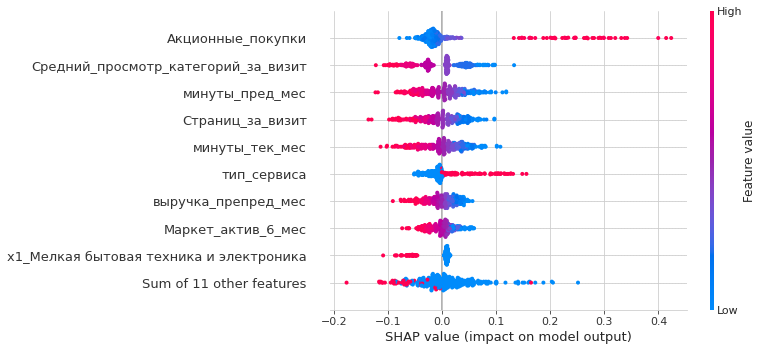

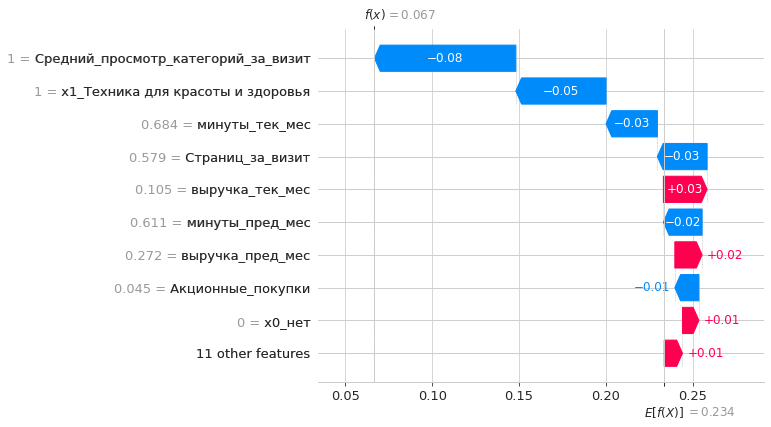

In [75]:
preprocessor = optuna_search.best_estimator_['preprocessor']
X_train_encoded = preprocessor.fit_transform(X_train)
model = optuna_search.best_estimator_.named_steps['models']
X_train_encoded.shape, model

X_shap = shap.kmeans(X_train_encoded, 19)
explainer = shap.KernelExplainer(model.predict_proba, X_shap,feature_names=names)

x_test_shap = preprocessor.transform(X_test)
shap_values = explainer(x_test_shap)
shap.plots.beeswarm(shap_values[:, :, 1])
shap.plots.waterfall(shap_values[0, :, 1])

  0%|          | 0/50 [00:00<?, ?it/s]

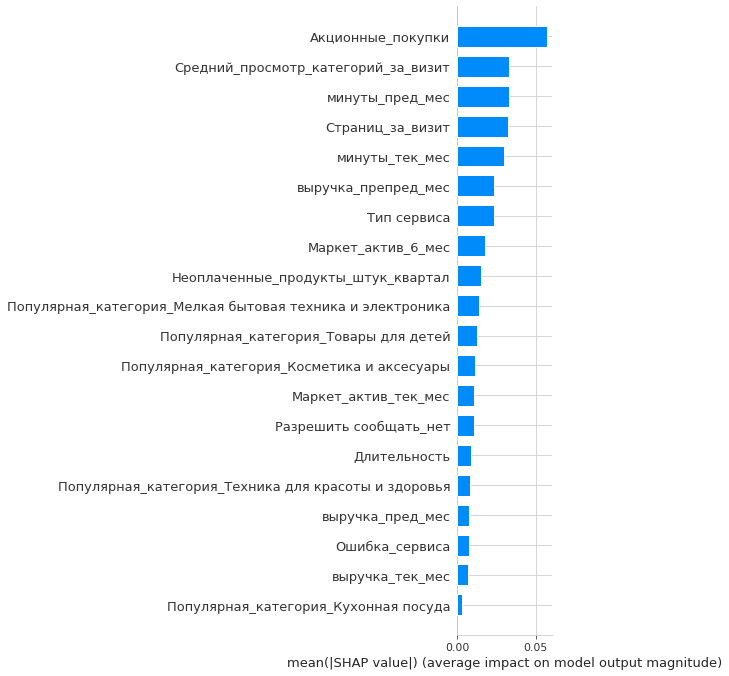

In [76]:
COUNT = 50
 
best_model = optuna_search.best_estimator_.named_steps['models']

preprocessor = optuna_search.best_estimator_.named_steps['preprocessor']
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(input_features=ohe_columns)
ord_feature_names = ord_columns
num_feature_names = num_columns


all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

X_train_preprocessed_smpl = shap.sample(X_train_preprocessed_df, COUNT, random_state=RANDOM_STATE)
X_test_preprocessed_smpl = shap.sample(X_test_preprocessed_df, COUNT, random_state=RANDOM_STATE)

explainer = shap.KernelExplainer(best_model.predict_proba, X_train_preprocessed_smpl)
shap_values = explainer.shap_values(X_test_preprocessed_smpl)

shap.summary_plot(shap_values[:, :, 1], X_test_preprocessed_smpl, plot_type='bar' )

In [77]:
preprocessor = random_search.best_estimator_['preprocessor']
names = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out().tolist()
names.append('тип_сервиса')
for i in num_columns:
    names.append(i)
names # Выведем имена полученных признаков, они нам пригодятся

['x0_нет',
 'x1_Косметика и аксесуары',
 'x1_Кухонная посуда',
 'x1_Мелкая бытовая техника и электроника',
 'x1_Техника для красоты и здоровья',
 'x1_Товары для детей',
 'тип_сервиса',
 'Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'выручка_пред_мес',
 'выручка_тек_мес',
 'выручка_препред_мес',
 'минуты_пред_мес',
 'минуты_тек_мес']

  0%|          | 0/324 [00:00<?, ?it/s]

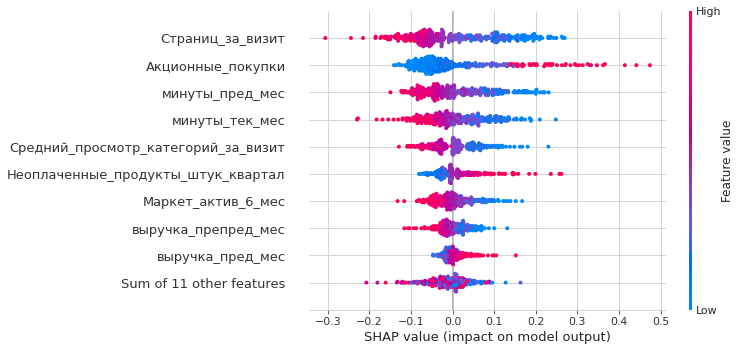

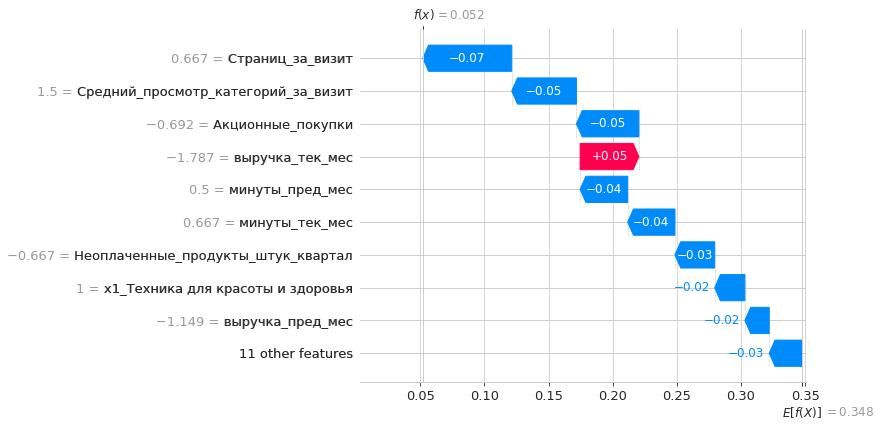

In [79]:
preprocessor = random_search.best_estimator_['preprocessor']
X_train_encoded = preprocessor.fit_transform(X_train)
model = random_search.best_estimator_.named_steps['models']
X_train_encoded.shape, model

X_shap = shap.kmeans(X_train_encoded, 19)
explainer = shap.KernelExplainer(model.predict_proba, X_shap,feature_names=names)

x_test_shap = preprocessor.transform(X_test)
shap_values = explainer(x_test_shap)
shap.plots.beeswarm(shap_values[:, :, 1])
shap.plots.waterfall(shap_values[0, :, 1])

На барплоте по итогу сэмплировал:

  0%|          | 0/50 [00:00<?, ?it/s]

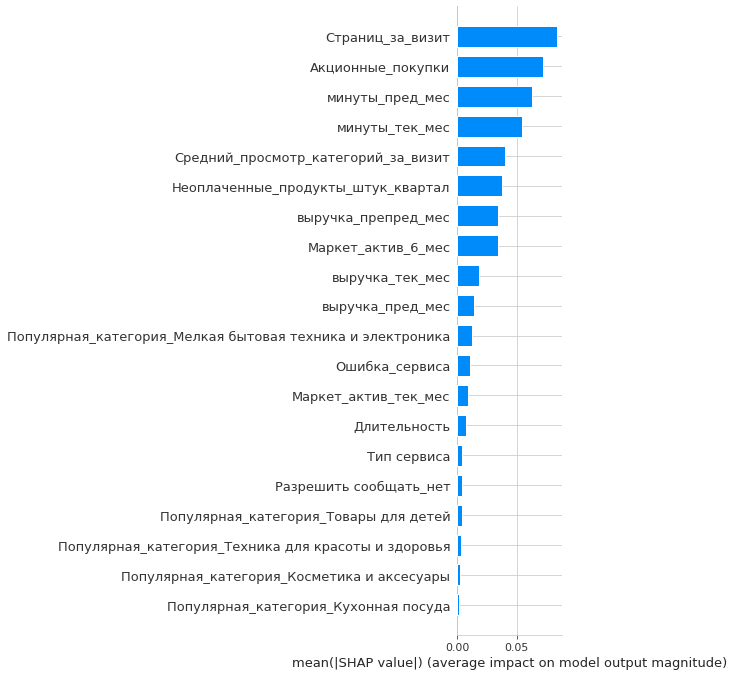

In [80]:
COUNT = 50
 
best_model = random_search.best_estimator_.named_steps['models']

preprocessor = random_search.best_estimator_.named_steps['preprocessor']
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(input_features=ohe_columns)
ord_feature_names = ord_columns
num_feature_names = num_columns


all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

X_train_preprocessed_smpl = shap.sample(X_train_preprocessed_df, COUNT, random_state=RANDOM_STATE)
X_test_preprocessed_smpl = shap.sample(X_test_preprocessed_df, COUNT, random_state=RANDOM_STATE)

explainer = shap.KernelExplainer(best_model.predict_proba, X_train_preprocessed_smpl)
shap_values = explainer.shap_values(X_test_preprocessed_smpl)

shap.summary_plot(shap_values[:, :, 1], X_test_preprocessed_smpl, plot_type='bar' )

### Вывод по важности признаков

Анализ интерпретации работы модели выявил следующие особенности:

Сильнее всего на предсказания модели влияют признаки говорящие об активности пользователя на сайте (страницы за визит и время(минуты) проведенное на сайте, среднее количество просмотров категорий за визит), а также: акционные покупки, маркетинговая активность и неоплаченные покупки за квартал.

Влияние остальных признаков существенно ниже вышеуказанных. Также следует отметить, что у модели нет "любимого" признака, который намного сильнее остальных влиял бы на предсказания.

Интерпретация SHAP значений поможет составить план по сохранению покупательской активности у клиентов.

В качестве возможный рекомендаций:

    -Сохранять высокую маркетинговую активность, 
    -разрабатывать или улучшать рекомендательную систему (по типу "возможно вам понравится этот товар")
    -сообщать пользователям давшим согласие по поводу акций на их любимые товары.

## Сегментация покупателей

### Сегментируем

In [81]:
df1.set_index('id', inplace=True)

In [82]:
money.set_index('id', inplace=True)

In [83]:
df1.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_пред_мес,выручка_препред_мес,выручка_тек_мес,минуты_пред_мес,минуты_тек_мес
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [84]:
money.head()

,Прибыль
id,
215348,0.98
215349,4.16
215350,3.13
215351,4.87
215352,4.21


In [85]:
threshold = 0.7

# 8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
# Применим модель для всех данных
best_model = random_search.best_estimator_
predictions = best_model.predict_proba(X)[:, 1]
prediction_flags = np.where(predictions > threshold, True, False)

Выбираем сегмент с высокой вероятностью снижения покупательской активности (более 70%) и наиболее высокой прибылью.

In [86]:
segment = df1.join(money)
segment['вероятность_снижения'] = predictions
seg_1 =  segment.loc[prediction_flags]
seg_1 =  seg_1.loc[segment['Прибыль'] > 3]
seg_2 = segment.loc[segment['вероятность_снижения']<=0.7]
seg_2 = seg_2.loc[seg_2['Прибыль']<=3]
seg_3 = segment.loc[segment['вероятность_снижения']<0.7]
seg_3 = seg_3.loc[seg_3['Прибыль']>3]
seg_4 = segment.loc[segment['вероятность_снижения']>0.7]
seg_4 = seg_4.loc[seg_4['Прибыль']<3]
merged = seg_2.merge(seg_3, how = 'outer')
merged = merged.merge(seg_4, how = 'outer')

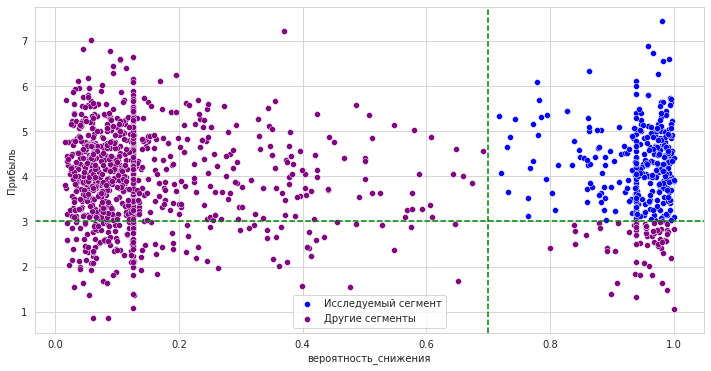

In [87]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=seg_1,  x='вероятность_снижения', y='Прибыль', label='Исследуемый сегмент', color='blue')
sns.scatterplot(data=merged,  x='вероятность_снижения', y='Прибыль', label='Другие сегменты', color='purple')
plt.legend()
plt.axvline(x=0.7, color='green', linestyle='--')
plt.axhline(y=3, color='green', linestyle='--')
plt.show()

In [88]:
seg_1.head() #проверим, всё ли верно

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_пред_мес,выручка_препред_мес,выручка_тек_мес,минуты_пред_мес,минуты_тек_мес,Прибыль,вероятность_снижения
id,,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16,0.985017
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87,0.735334
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21,0.939427
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95,0.793008
215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12,3.62,0.802776


### Выбор группы покупателей и предложения о сохранении и увеличении её покупательской активности

Исходя из списка параметров, полученных в 7 части (влияющих на снижение покупательской активности), возьмем первые 5 и выделим группу на основе них "Акционные покупки", "Страниц_за_визит", "минут_пред_мес", "минут_тек_мес", "Средний_просмотр_категорий_за_визит".

Text(0.5, 1.0, 'Акционные покупки')

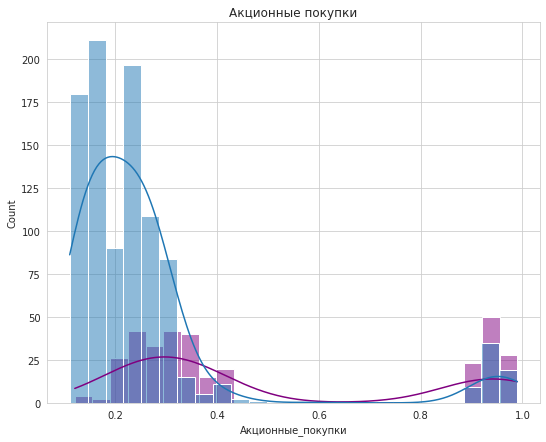

In [89]:
plt.figure(figsize=(30, 7))

plt.subplot(1, 3, 1)
sns.histplot(seg_1['Акционные_покупки'], bins=25, color='purple', kde=True)  # Гистограмма для seg_1
sns.histplot(merged['Акционные_покупки'], bins=25, kde=True)  # Гистограмма для merged
plt.title('Акционные покупки')

Небольшое количество покупателей из выбранного сегмента любят акционные покупки (а кто не любит?), наверное, одним из решений, хоть и банальных будет увеличение количества акций и более "агрессивное" их продвижение.

Text(0.5, 1.0, 'Страниц_за_визит')

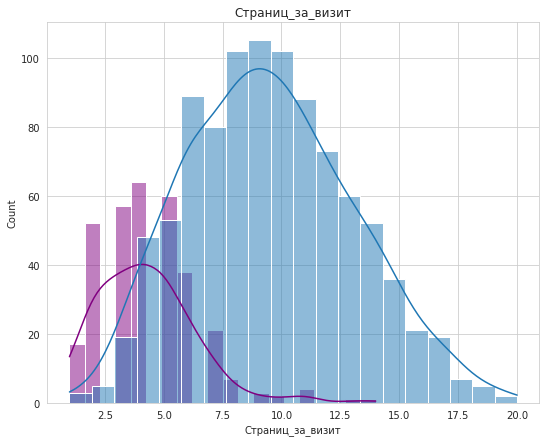

In [90]:
plt.figure(figsize=(30, 7))

plt.subplot(1, 3, 1)
sns.histplot(seg_1['Страниц_за_визит'], bins=20, color='purple', kde=True)  # Гистограмма для df_seg_1
sns.histplot(merged['Страниц_за_визит'], bins=20, kde=True)  # Гистограмма для df_merge
plt.title('Страниц_за_визит')

Мало просерфенных страниц, повторюсь, надо разработать или улучшить рекомендательную систему предложения товаров (что-то типа, "Вам могло бы понравится это")

Text(0.5, 1.0, 'Минут на сайте за текущий месяц')

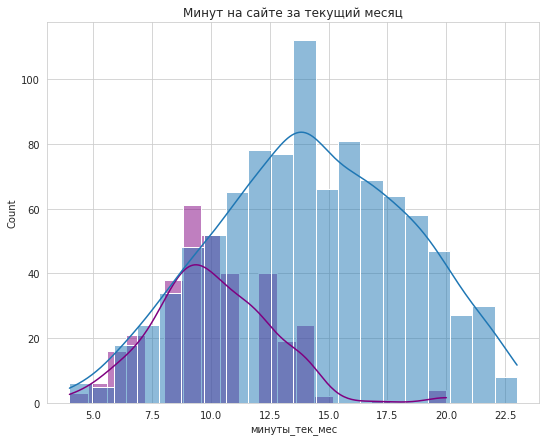

In [91]:
plt.figure(figsize=(30, 7))

plt.subplot(1, 3, 1)
sns.histplot(seg_1['минуты_тек_мес'], bins=20, color='purple', kde=True)  # Гистограмма для df_seg_1
sns.histplot(merged['минуты_тек_мес'], bins=20, kde=True)  # Гистограмма для df_merge
plt.title('Минут на сайте за текущий месяц')

Text(0.5, 1.0, 'Минут на сайте за предыдущий_месяц')

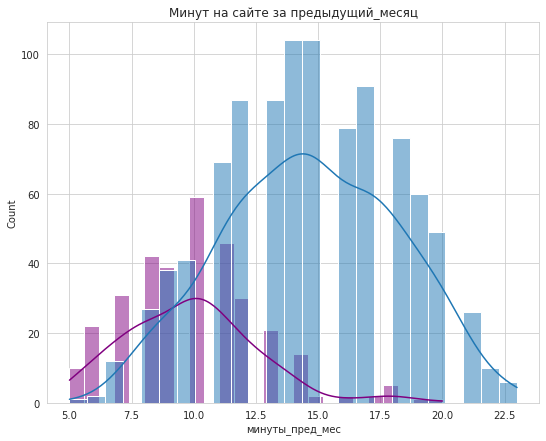

In [92]:
plt.figure(figsize=(30, 7))

plt.subplot(1, 3, 1)
sns.histplot(seg_1['минуты_пред_мес'], bins=25, color='purple', kde=True)
sns.histplot(merged['минуты_пред_мес'], bins=25, kde=True)
plt.title('Минут на сайте за предыдущий_месяц')

Здесь, и выше, вероятно снова поможет улучшение и доработка рекомендательной системы предложения товаров.

Text(0.5, 1.0, 'Средний просмотр категорий за визит')

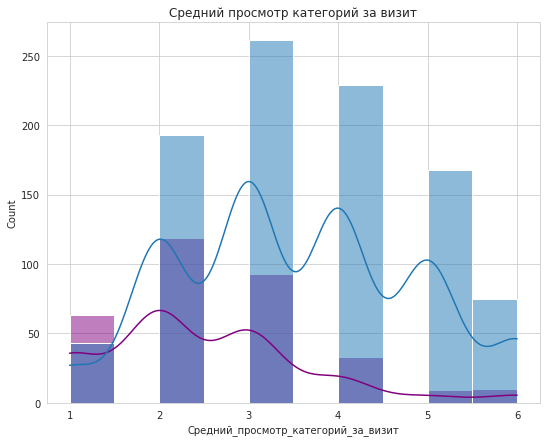

In [93]:
plt.figure(figsize=(30, 7))

plt.subplot(1, 3, 1)
sns.histplot(seg_1['Средний_просмотр_категорий_за_визит'], bins=10, color='purple', kde=True)  # Гистограмма для df_seg_1
sns.histplot(merged['Средний_просмотр_категорий_за_визит'], bins=10, kde=True)  # Гистограмма для df_merge
plt.title('Средний просмотр категорий за визит')


Видно, что люди в этом сегменте имеют список "любимых товаров" - надо постараться расширить их предпочтения с помощью акций и опять-таки рекомендательной системы.


### Вывод по сегментации

Выбранный сегмент: Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью

Можно заметить, что часть людей из выбранного сегмента любят акционные покупки, им можно попробовать предлагать больше акций и вести более активную маркетинговую стратегию.
Для увеличения времени, количества просмотров и времени проведенного на сайте магазина следует разработать и/или улучшить рекомендательную систему предложения товаров (похожие товары/вам могло бы понравится/подобные предложения).
Также возможно, людям что-то не нравится в оформлении или нейдобно серфить по сайту. Эти моменты следует изучить отдельно.
Людям которые покупают одно и тоже, с целью сохранения их покупательской активности следует постараться увеличить номенклатуру товаров которая им нравится - здесь снова помогут акции и рекомендации.

## Итоговый вывод

Данная проектная работа была крайне сложной. Она включала установку сторонних библиотек, импорт различных метрик и функций.


- Были загружены и установлены sklearn, phik, optuna(хоть и не использовалась фактически);

- Загружены и проверены на корректность данные;

- Все дф прошли последвоательную предобработку на наличие и устранение выбросов, дубликатов, аномалий;

- В ИАД было исследваны распределения признаков и как количественных так и категориальных;

- Проведена необходимая склейка датафреймов размер получившегося дф 1296 строк, 18 столбцов;

- Корреляционный анализ не выявил мультиколлинеарностей;

- Был создан пайплайн с целью поиска наилучшей модели предсказания целевого признака "Покупательская активность" из 4 возможных (LogisticRegression, SVC, KNN, DecisionTree). Лучшей моделью по итогу через RandomizeSearch стала SVC (метод опорных векторов) со значением метрики roc_auc 0,91 (есть небольшой дисбаланс классов целевого признака - для этого лучше подходит roc_auc, да и заказчик не уточнил, какие предсказания для него важнее. В целом данная метрика просто более универсальная);

- Проведен Анализ важности признаков, который показал, что самые важные признаки влияющие на предсказание - это количество страниц_за_визит, средний просмотр за визит, и минуты просмотров. Также существенное влияние оказывают акционные покупки и маркетинговая активность;

- Проведена сегментация пользователей, после которой можно дать некоторые рекомендации бизнесу для сохранения прибыли:
Выбранный сегмент: Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью
Можно заметить, что часть людей из выбранного сегмента любят акционные покупки, им можно попробовать предлагать больше акций и вести более активную маркетинговую стратегию.
Для увеличения времени, количества просмотров и времени проведенного на сайте магазина следует разработать и/или улучшить рекомендательную систему предложения товаров (похожие товары/вам могло бы понравится/подобные предложения).
Также возможно, людям что-то не нравится в офрмлении или им неудобно серфить по сайту. Эти моменты следует изучить отдельно.
Людям которые покупают одно и тоже, с целью сохранения их покупательской активности следует постараться увеличить номенклатуру товаров которая им нравится - здесь снова помогут акции и рекомендации.